### Group Members: Aamir Mohsin, Weston Lu, Kevin Wang

# Data Science Lab: Lab 4

Submit:
1. A pdf of your notebook with solutions.
2. A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

1. Understanding Entropy
2. Scraping data.
3. Intro to Logistic Regression
4. Revisiting CIFAR-10 and MNIST.

## Problem 1 (Optional)

Read Shannon's 1948 paper 'A Mathematical Theory of Communication'. Focus on pages 1-19 (up to Part II), the remaining part is more relevant for communication.

https://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf


## Problem 2: (Optional) Scraping, Entropy and ICML papers

ICML -- the International Conference on Machine Learning -- is a top research conference in Machine learning. Scrape all the pdfs of all ICML 2021 papers from http://proceedings.mlr.press/v139/, and answer the following questions.

**Part 1.** What are the top 10 common words in the ICML papers?  

**Part 2.**  Let $Z$ be a randomly selected word in a randomly selected ICML paper. Estimate the entropy of $Z$.

**Part 3.**  Synthesize a random paragraph using the marginal distribution over words.

**Part 4.** Synthesize a random paragraph using an n-gram model on words. Synthesize a random paragraph using any model you want. We will learn more about generating text in later classes when we get into NLP.

Note: downloading may take some time.

## Problem 3: Logistic Regression

The following is a logistic regression problem using a real data set, made available by the authors of the book ``Applied Regression and Muiltilevel Modeling'' by Gelman and Hill.

Download the data from the book, which you can find here http://www.stat.columbia.edu/~gelman/arm/software/. In particular, we are interested in the **arsenic** data set. The file **wells.dat** contains data on 3,020 households in Bangladesh. For each family, the natural arsenic level of each well was measured. In addition, the distance to the nearest safest well was measured. Each family is also described by a feature that relates to their community involvement, and a feature that gives the education level of the head of household. We are interested in building a model that predicts whether the family decided to switch wells or not, based on being informed of the level of arsenic in the well. Thus the "label" for this problem is the binary vector that is the first column of the dataset, labeled "switch."

**Part 1.** Fit a logistic regression model using only an offset term and the distance to the nearest safe well.

**Part 2.** Plot your answer: that is, plot the probability of switching wells as a function of the distance to the nearest safe well.

**Part 3.** Interpreting logistic regression coefficients: Use the "rule-of-4" discussed in class, to interpret the solution: what can you say about the change in the probability of switching wells, for every additional 100 meters of distance?

**Part 4.** Now solve a logistic regression incorporating the constant term, the distance and also arsenic levels. Report the coefficients

**Part 5.** Next we want to answer the question of which factor is more significant, distance, or arsenic levels? This is not a well specified question, since these two features have different units. One natural choice is to ask if after normalizing by the respective standard deviations of each feature, if moving one unit in one (normalized) feature predicts a larger change in probability of switching wells, than moving one unit in the other (also normalized) feature. Use this reasoning to answer the question.

**Part 6.** Now consider all the features in the data set. Also consider adding interaction terms among all features that have a large main effect. Use cross validation to build the best model you can (using your training set only), and then report the test error of your best model. (Note that since you have essentially unlimited access to your test set, this opens the door for massive overfitting. In contrast, Kaggle competitions try to mollify this by giving you only limited access to the test set.)

**Part 7.** (Optional) Now also play around with $\ell_1$ and $\ell_2$ regularization, and try to build the most accurate model you can (accuracy computed on the test data).

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [2]:
# Part 1
data = pd.read_csv('wells.dat', delim_whitespace=True)
X = data[['dist']]
y = data['switch']
# Only fit the logreg model, don't predict anything, so don't need to split the data
model = LogisticRegression()
model.fit(X, y)

C:\Users\conne\AppData\Local\Temp\ipykernel_31672\2050024627.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('wells.dat', delim_whitespace=True)


LogisticRegression()

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


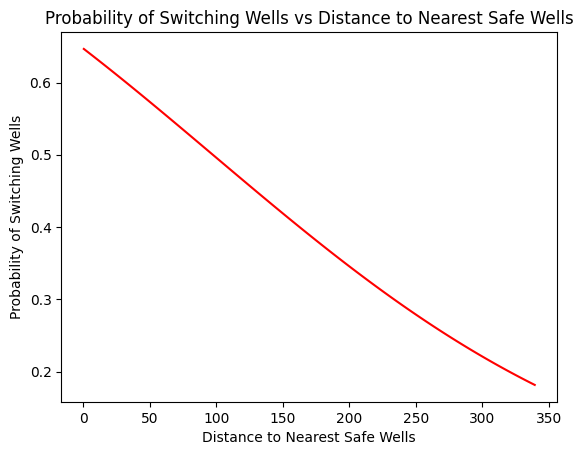

In [3]:
# Part 2

# x is the distance to the nearest safe well, which uses X(the distance feature of the data)
X_range = np.linspace(X.min(), X.max(), 100)
# y is the probability of switching wells, which uses the model to predict the probability of switching wells
y_range = model.predict_proba(X_range)[:, 1]

plt.plot(X_range, y_range, color='red')
plt.title('Probability of Switching Wells vs Distance to Nearest Safe Wells')
plt.xlabel('Distance to Nearest Safe Wells')
plt.ylabel('Probability of Switching Wells')
plt.show()

In [4]:
# Part 3:
# Interpreting logistic regression coefficients: Use the "rule-of-4" discussed in class, to interpret the solution: what can you say about the change in the probability of switching wells, 
# for every additional 100 meters of distance?

print(f'The coefficient for distance is: {model.coef_[0][0]}')


The coefficient for distance is: -0.00621880756449879


Part 3 continuation: 
The coefficient for distance is ~ -0.006, which means that for every additional 1 meter of distance, the change in the probability of switching wells decreases by 0.006/4 = 0/0015.(this is from the "rule-of-4" from class, which states max of change = Bdist/4). Thus, for every additional 100 meters of distance, the change in the probability of switching wells decreases by 0.15, which is observed in the plot as well.

In [5]:
# Part 4: Now solve a logistic regression incorporating the constant term, the distance and also arsenic levels. Report the coefficients

#  Use both distance and arsenic levels as features for X, but y stays the same(the target); we use data[[]] once again as X is expected to be a dataframe/matrix, not a series.
X2 = data[['dist', 'arsenic']] # call it X2, just in case prev X is needed later on
model2 = LogisticRegression()   # call it model2, just in case prev model is needed later on
model2.fit(X2, y)

# w and b are the coefficients and intercept of the model, w and b var names coming from code in class.
w = model2.coef_[0]
b = model2.intercept_[0]
print(f'The coefficients for distance and arsenic are: {w[0], w[1]}')
print(f'The intercept is: {b}')


The coefficients for distance and arsenic are: (-0.008961243633780928, 0.4600009477116841)
The intercept is: 0.003678103767641184


In [6]:
# Part 5: Next we want to answer the question of which factor is more significant, distance, or arsenic levels? This is not a well specified question, since these two features have 
# different units. One natural choice is to ask if after normalizing by the respective standard deviations of each feature, if moving one unit in one (normalized) feature predicts a larger 
# change in probability of switching wells, than moving one unit in the other (also normalized) feature. Use this reasoning to answer the question.

# normalize steps:
means = X2.mean()
std_devs = X2.std()
X2 = (X2 - means) / std_devs    # normalize X2

# fit the model again
model2 = LogisticRegression()
model2.fit(X2, y)

# coefficients for distance and arsenic after normalization
coeffs = model2.coef_[0]

print(f'Coefficient for distance after normalization: {coeffs[0]}')
print(f'Coefficient for arsenic after normalization: {coeffs[1]}')

Coefficient for distance after normalization: -0.3443324312189316
Coefficient for arsenic after normalization: 0.5091123224098796


Part 5 Continuation: Based on the coefficients, the factor arsenc is more significant than distance since after taking the absolute value of both, the coefficient corresponding to arsenic has a larger magnitude than the coefficient corresponding to distance. Thus, arsenic levels is the more significant factor than the distance as moving one unit for arsenic predicts a larger change in probability of switching wells than distance.

In [7]:
# Part 6: Now consider all the features in the data set. Also consider adding interaction terms among all features that have a large main effect. Use cross validation to build the best model you 
# can (using your training set only), and then report the test error of your best model. (Note that since you have essentially unlimited access to your test set, this opens the door for massive overfitting. 
# In contrast, Kaggle competitions try to mollify this by giving you only limited access to the test set.)

X = data.drop(columns=['switch'])
y = data['switch']


## Problem 4: Logistic Regression and CIFAR-10

In this problem you will explore the data set CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You will also explore visualizing the solution.

**Part 1.** (Optional) You can read about the CIFAR-10 and CIFAR-100 data sets here: https://www.cs.toronto.edu/~kriz/cifar.html.

**Part 2.** (Optional) OpenML curates a number of data sets. You will use a subset of CIFAR-10 provided by them. Read here for a description: https://www.openml.org/d/40926.

**Part 3.** Use the **fetch_openml** command from **sklearn.datasets** to import the CIFAR-10-Small data set. There are 20,000 data points. Do a train-test split on 3/4 - 1/4.

**Part 4.** Figure out how to display some of the images in this data set, and display a couple. While not high resolution, these should be recognizable if you are doing it correctly.

**Part 5.** You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (**multi_class='multinomial'**). Use cross validation to see how good your accuracy can be. In this case, cross validate to find as good regularization coefficients as you can, for $\ell_1$ and $\ell_2$ regularization (i.e., for the Lasso and Ridge penalties), which are naturally supported in **sklearn.linear_model.LogisticRegression**. I recommend you use the solver **saga**. Note that this is quite a large problem: $20,000$ data points, each of them $3,072$-dimensional. Report your training and test losses.

**Part 6.** How sparse can you make your solutions without deteriorating your testing error too much? Here, I am asking you to try to obtain a sparse solution that has test accuracy that is close to the best solution you found.


In [8]:
# Part 3
from sklearn.datasets import fetch_openml

# import CIFAR-10 Small data set
data = fetch_openml('CIFAR_10_small')
X = data['data']
y = data['target']

# train-test split on 3/4 - 1/4 on the 20,000 data points, 3/4 - 1/4 coming from the test_size parameter of the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



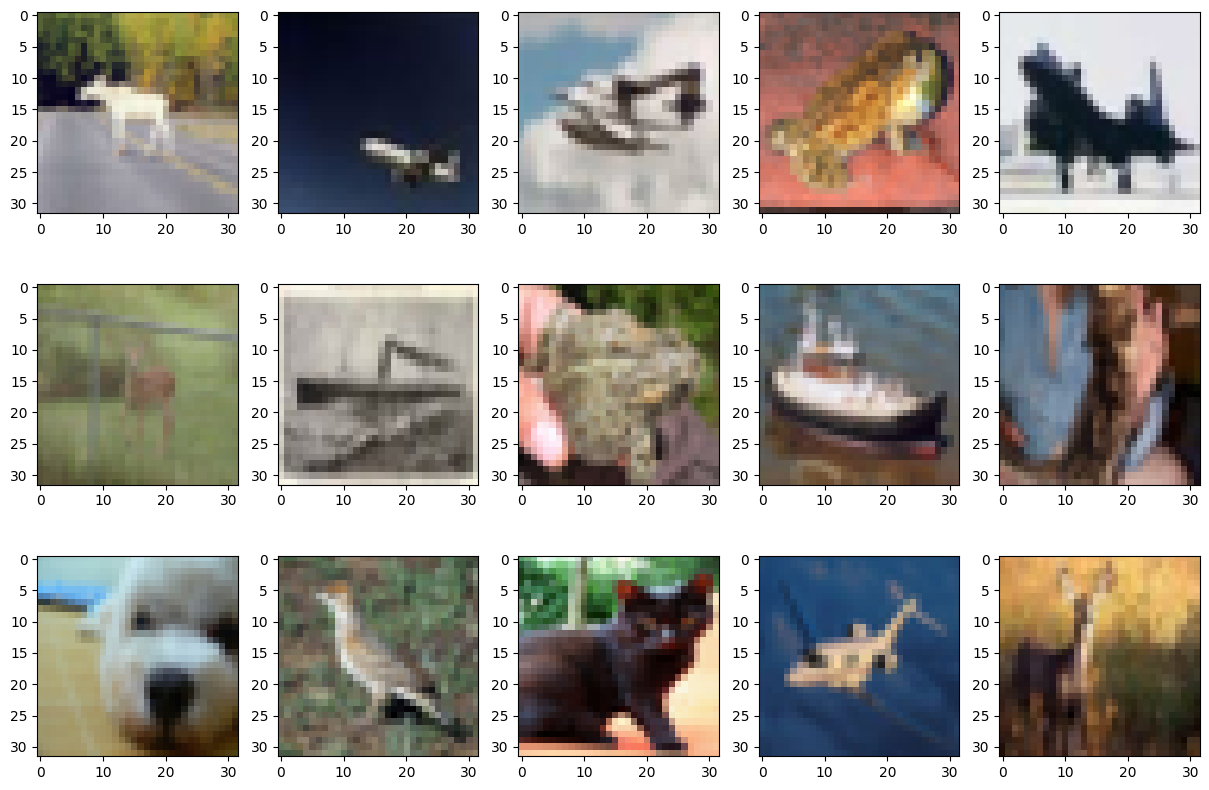

In [9]:
# Part 4
images = np.array(X_train.astype('uint8')) # convert to uint8 to display images
fig, ax = plt.subplots(3, 5, figsize=(15, 10)) # display some images in the dataset, 3 x 5

for i in range(3):
    for j in range(5):
        # these two lines below are required to make the images recognizable 
        image = images[i * 5 + j].reshape(3, 32, 32).transpose(1, 2, 0) # reshape the image to 3 x 32 x 32, then transpose to 32 x 32 x 3
        image = np.clip(image, 0, 255).astype('uint8') # clip the image to 0-255, then convert to uint8
        ax[i, j].imshow(image)
plt.show()

In [ ]:
# Part 5: 
# You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (**multi_class='multinomial'**). Use cross validation to see how good your 
# accuracy can be. In this case, cross validate to find as good regularization coefficients as you can, for $\ell_1$ and $\ell_2$ regularization (i.e., for the Lasso and Ridge penalties), which are 
# naturally supported in **sklearn.linear_model.LogisticRegression**. I recommend you use the solver **saga**. Note that this is quite a large problem: $20,000$ data points, each of them $3,072$-dimensional. 
# Report your training and test losses.
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV

# use GridSearchCV or something to find the best hyperparameters



# create logreg using multi_class='multinomial', use solver saga, and use logreg's cv parameter to cross validate
logreg_l1 = LogisticRegressionCV(penalty='l1', solver='saga', multi_class='multinomial', max_iter=1000, cv=5)
logreg_l2 = LogisticRegressionCV(penalty='l2', solver='saga', multi_class='multinomial', max_iter=1000, cv=5)

# fit the models
logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)

# predict the probabilities
y_train_prob = logreg_l1.predict_proba(X_train)
y_test_prob = logreg_l1.predict_proba(X_test)

# training and test loss for l1
train_loss_l1 = log_loss(y_train, y_train_prob)
test_loss_l1 = log_loss(y_test, y_test_prob)

print(f"Training loss: {train_loss_l1}")
print(f"Test loss: {test_loss_l1}")

# training and test loss for l2
y_train_proba_l2 = logreg_l2.predict_proba(X_train)
y_test_proba_l2 = logreg_l2.predict_proba(X_test)

train_loss_l2 = log_loss(y_train, y_train_proba_l2)
test_loss_l2 = log_loss(y_test, y_test_proba_l2)

print(f"L2 Training loss: {train_loss_l2}")
print(f"L2 Test loss: {test_loss_l2}")

## Problem 5: Multi-class Logistic Regression -- Visualizing the Solution

You will repeat the previous problem but for the MNIST data set which you will find here: https://www.openml.org/d/554. As we have seen before, MNIST is a data set of handwritten digits, and is considered one of the "easiest" image recognition problems in computer vision. We will see here how well logistic regression does, as you did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and that in connection to this, sparsity can be useful.


**Part 1.** Use the **fetch_openml** command from to import the MNIST data set, and choose a reasonable train-test split.

**Part 2.** Again run multi-class logistic regression on these using the cross entropy loss, as you did above. Try to optimize the hyperparameters. Report your training and test loss.

**Part 3.** Choose an $\ell_1$ regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.
**Part 4.** Note that in Logistic Regression, the coefficients returned (i.e., the $\beta$'s) are the same dimension as the data. Therefore we can pretend that the coefficients of the solution are an image of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to the 10 classes. You should observe that, at least for the sparse solutions, these "kind of" look like the digits they are classifying.
